# Training and Evaluate Model [Random Forest]

Based on exprience, training a Random Forest and it is a good classifier.

Import all necessary packages

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from joblib import dump
from src.models import eval_model as evm
from src.models import eval_baseline as evb
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


All good. Proceed toload the processed datasets

#### Load data from the processsed location

In [5]:
x_train = np.load('../data/processed/sp_x_train.npy')
y_train  = np.load('../data/processed/sp_y_train.npy' )

x_val = np.load('../data/processed/sp_x_val.npy')
y_val  = np.load('../data/processed/sp_y_val.npy' )

x_test = np.load('../data/processed/sp_x_test.npy')
y_test = np.load('../data/processed/sp_y_test.npy' )

x = np.load('../data/processed/sp_x.npy')
y = np.load('../data/processed/sp_y.npy' )


x_col_name = np.load('../data/processed/sp_x_col_name.npy')
y_col_name = np.load('../data/processed/sp_y_col_name.npy' )

All Good. 

#### Proceed to perform Baseline test

Accuracy Score:  0.8336916161813562  F1 Score  0.9093040605350101  Precision Score  0.8336916161813562  Recall Score  1.0 (BASELINE)


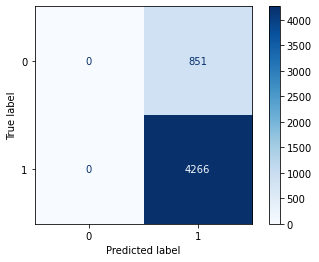

In [6]:
evb.eval_baseline(x_train,y_train)

Basline has good score. The challenge will be to predict with high precision, meaning predict the zeros as correctly as possible

#### Proceed to train a Random Forest
Expectation: it will predict with super high accuracy, essentially memorizing data

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.8296875  F1 Score  0.9064377682403433  Recall Score  0.9896907216494846  R2 Score  0.8296875  ROC_AUC_SCORE  0.6546149750738106 ( Validate )


(RandomForestClassifier(random_state=8), 1.0, 0.6546149750738106)

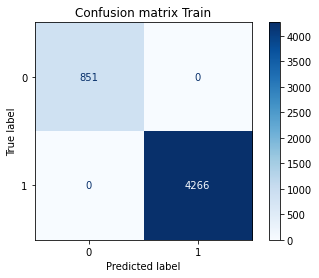

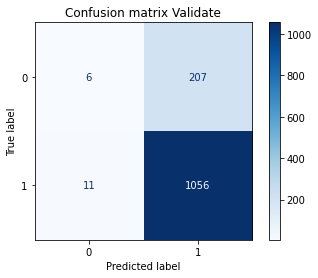

In [7]:
evm.eval_model(RandomForestClassifier(random_state=8),x_train,y_train,x_val,y_val)

RF with default parameter is behaving as expected. The training has learned the data and the Validation set underfits.

#### As this is imbalanced data, add different class_weight to see if it performance any better 

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.83125  F1 Score  0.9075342465753425  Recall Score  0.993439550140581  R2 Score  0.83125  ROC_AUC_SCORE  0.5987675506333848 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.01}, random_state=8),
 1.0,
 0.5987675506333848)

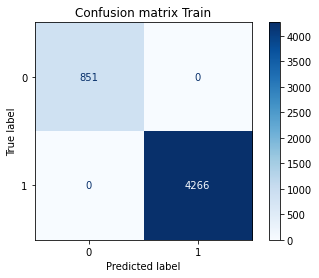

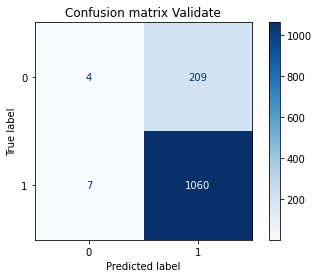

In [8]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={0:10,1:0.01}),x_train,y_train,x_val,y_val)

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.83359375  F1 Score  0.9088575096277278  Recall Score  0.9953139643861293  R2 Score  0.83359375  ROC_AUC_SCORE  0.6006837651966155 ( Validate )


(RandomForestClassifier(class_weight={0: 100, 1: 0.001}, random_state=8),
 1.0,
 0.6006837651966155)

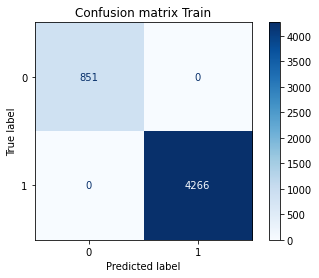

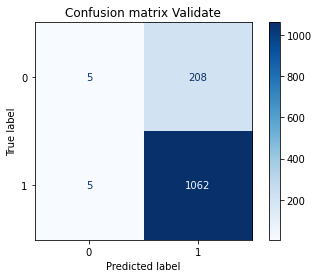

In [9]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={0:100,1:0.001}),x_train,y_train,x_val,y_val)

Using the weights from Data alaysis section 1:0.833688 | 0:0.166312

and then trying different variations of the split

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  0.9999999999999999 ( Train )
Accuracy Score:  0.8328125  F1 Score  0.9084687767322497  Recall Score  0.9953139643861293  R2 Score  0.8328125  ROC_AUC_SCORE  0.6351382270505256 ( Validate )


(RandomForestClassifier(class_weight={0: 0.84, 1: 0.17}, random_state=8),
 0.9999999999999999,
 0.6351382270505256)

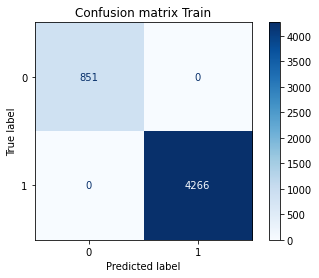

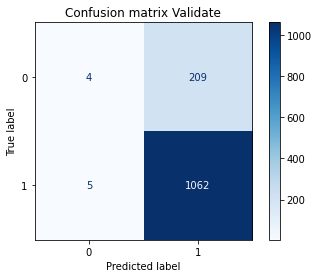

In [10]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={0:.84,1:0.17}),x_train,y_train,x_val,y_val)

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.83203125  F1 Score  0.9079229122055673  Recall Score  0.993439550140581  R2 Score  0.83203125  ROC_AUC_SCORE  0.6248377487668907 ( Validate )


(RandomForestClassifier(class_weight={0: 0.833688, 1: 0.166312}, random_state=8),
 1.0,
 0.6248377487668907)

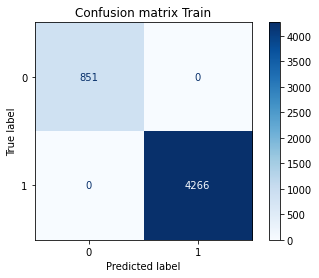

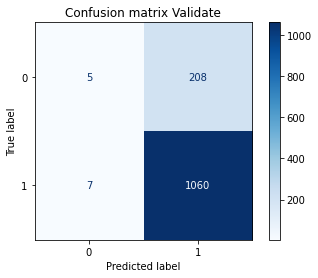

In [11]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={0: 0.833688, 1: 0.166312}),x_train,y_train,x_val,y_val)

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.82734375  F1 Score  0.9053533190578159  Recall Score  0.9906279287722587  R2 Score  0.82734375  ROC_AUC_SCORE  0.621036119874511 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.3}, random_state=8),
 1.0,
 0.621036119874511)

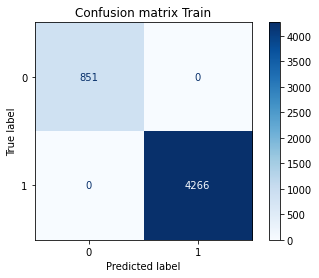

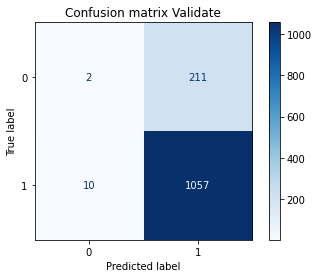

In [12]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={0: 10, 1: 0.3}),x_train,y_train,x_val,y_val)

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.83359375  F1 Score  0.9087794432548181  Recall Score  0.9943767572633552  R2 Score  0.83359375  ROC_AUC_SCORE  0.6211857210114796 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.6}, random_state=8),
 1.0,
 0.6211857210114796)

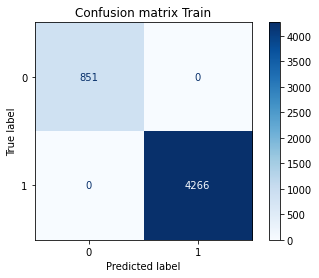

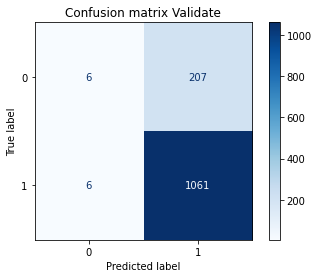

In [13]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={0: 10, 1: 0.6}),x_train,y_train,x_val,y_val)

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  0.9999999999999999 ( Train )
Accuracy Score:  0.8328125  F1 Score  0.9084687767322497  Recall Score  0.9953139643861293  R2 Score  0.8328125  ROC_AUC_SCORE  0.6196633094411518 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.9}, random_state=8),
 0.9999999999999999,
 0.6196633094411518)

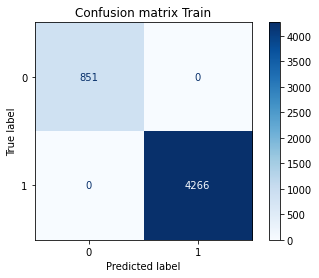

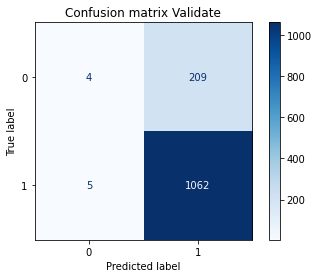

In [14]:
evm.eval_model(RandomForestClassifier(random_state=8,class_weight={0: 10, 1: 0.9}),x_train,y_train,x_val,y_val)

Clearly use class_weight alone does not help much

Now proceeding to trying the rest of hyper parameters

#### Tune n_estimators [as DEFAULT IS 100, run Round 1 with 50 and Round 2 with 150]

Accuracy Score:  0.999609145983975  F1 Score  0.9997656433091165  Recall Score  1.0  R2 Score  0.999609145983975  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.83203125  F1 Score  0.9080017115960632  Recall Score  0.9943767572633552  R2 Score  0.83203125  ROC_AUC_SCORE  0.5992075539774102 ( Validate )


(RandomForestClassifier(class_weight={0: 100, 1: 0.001}, n_estimators=50,
                        random_state=8),
 1.0,
 0.5992075539774102)

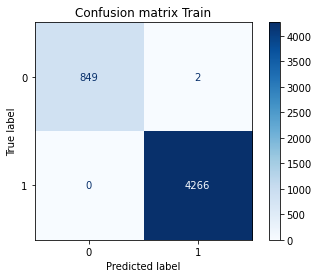

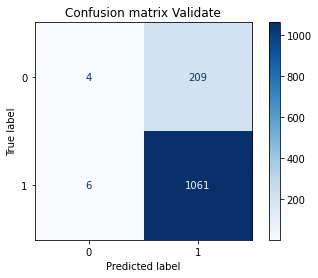

In [15]:
evm.eval_model(RandomForestClassifier(random_state=8,n_estimators= 50,class_weight={0:100,1:0.001}),x_train,y_train,x_val,y_val)

Not much improvements. Round 2 with n_estimators = 150

Accuracy Score:  1.0  F1 Score  1.0  Recall Score  1.0  R2 Score  1.0  ROC_AUC_SCORE  1.0 ( Train )
Accuracy Score:  0.83046875  F1 Score  0.907066381156317  Recall Score  0.9925023430178069  R2 Score  0.83046875  ROC_AUC_SCORE  0.6054446013789705 ( Validate )


(RandomForestClassifier(class_weight={0: 100, 1: 0.001}, n_estimators=150,
                        random_state=8),
 1.0,
 0.6054446013789705)

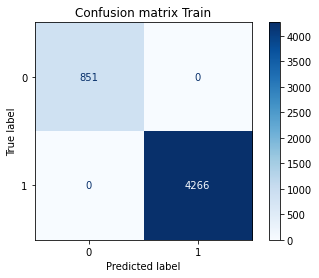

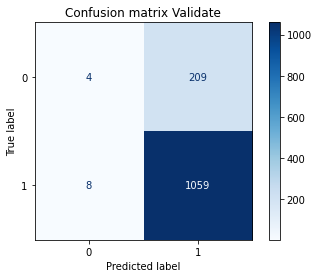

In [16]:
evm.eval_model(RandomForestClassifier(random_state=8,n_estimators= 150,class_weight={0:100,1:0.001}),x_train,y_train,x_val,y_val)

Not much improvements. Ignoring n_estimators for now

#### Tunning max_depth

Accuracy Score:  0.19171389486026968  F1 Score  0.059144676979071886  Recall Score  0.030473511486169714  R2 Score  0.19171389486026968  ROC_AUC_SCORE  0.6513093996583265 ( Train )
Accuracy Score:  0.1859375  F1 Score  0.04753199268738574  Recall Score  0.02436738519212746  R2 Score  0.1859375  ROC_AUC_SCORE  0.641513875505454 ( Validate )


(RandomForestClassifier(class_weight={0: 100, 1: 0.001}, max_depth=5,
                        random_state=8),
 0.6513093996583265,
 0.641513875505454)

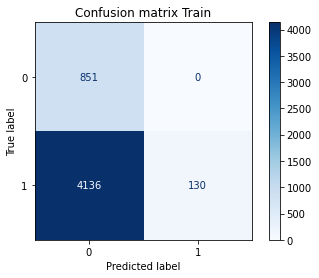

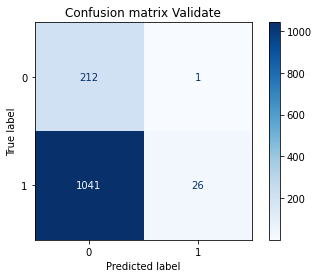

In [17]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 5,class_weight={0:100,1:0.001}),x_train,y_train,x_val,y_val)

Accuracy Score:  0.20187609927692007  F1 Score  0.08183453237410072  Recall Score  0.0426629160806376  R2 Score  0.20187609927692007  ROC_AUC_SCORE  0.6794445794170616 ( Train )
Accuracy Score:  0.19375  F1 Score  0.06690777576853527  Recall Score  0.03467666354264293  R2 Score  0.19375  ROC_AUC_SCORE  0.6385636530837634 ( Validate )


(RandomForestClassifier(class_weight={0: 100, 1: 0.001}, max_depth=10,
                        random_state=8),
 0.6794445794170616,
 0.6385636530837634)

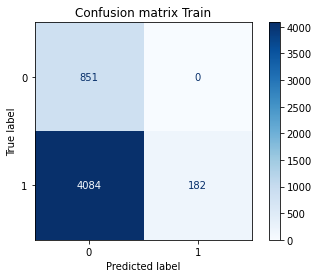

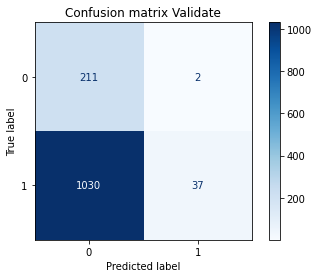

In [18]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 10,class_weight={0:100,1:0.001}),x_train,y_train,x_val,y_val)

Training is doing well now, but Validation set is not as good. Further tunning max_depth

Accuracy Score:  0.21242915770959547  F1 Score  0.10484229231452688  Recall Score  0.05532114392873887  R2 Score  0.21242915770959547  ROC_AUC_SCORE  0.7098215441638667 ( Train )
Accuracy Score:  0.20234375  F1 Score  0.08757819481680072  Recall Score  0.04592314901593252  R2 Score  0.20234375  ROC_AUC_SCORE  0.6021401762653397 ( Validate )


(RandomForestClassifier(class_weight={0: 100, 1: 0.001}, max_depth=15,
                        random_state=8),
 0.7098215441638667,
 0.6021401762653397)

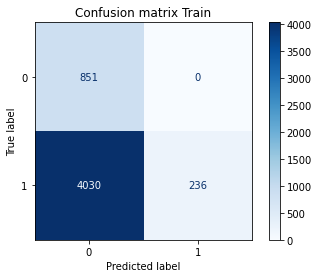

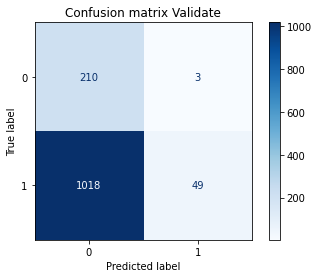

In [19]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:100,1:0.001}),x_train,y_train,x_val,y_val)

max_depth 15 is doing well, trying to adjust class weight to see if change in performance
#### Adjusting Class_weight to see improvements

Accuracy Score:  0.3818643736564393  F1 Score  0.4108772583348855  Recall Score  0.2585560243788092  R2 Score  0.3818643736564393  ROC_AUC_SCORE  0.8419349454021992 ( Train )
Accuracy Score:  0.34609375  F1 Score  0.38137472283813745  Recall Score  0.24179943767572634  R2 Score  0.34609375  ROC_AUC_SCORE  0.6091714297028656 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.1}, max_depth=15,
                        random_state=8),
 0.8419349454021992,
 0.6091714297028656)

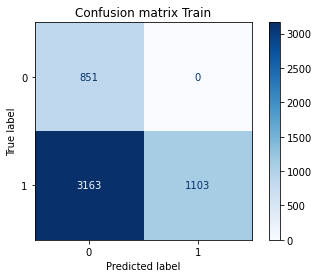

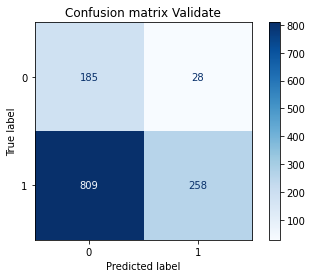

In [20]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.1}),x_train,y_train,x_val,y_val)

Accuracy Score:  0.6478405315614618  F1 Score  0.7322436849925706  Recall Score  0.5775902484763245  R2 Score  0.6478405315614618  ROC_AUC_SCORE  0.935858533271852 ( Train )
Accuracy Score:  0.53515625  F1 Score  0.6460440214158238  Recall Score  0.5089034676663543  R2 Score  0.53515625  ROC_AUC_SCORE  0.6289781802341697 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.3}, max_depth=15,
                        random_state=8),
 0.935858533271852,
 0.6289781802341697)

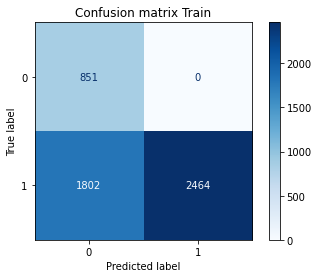

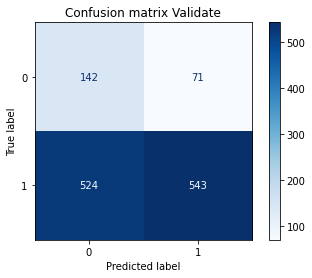

In [21]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.3}),x_train,y_train,x_val,y_val)

Accuracy Score:  0.8782489740082079  F1 Score  0.9212289796434441  Recall Score  0.853961556493202  R2 Score  0.8782489740082079  ROC_AUC_SCORE  0.9846268943682261 ( Train )
Accuracy Score:  0.7  F1 Score  0.808955223880597  Recall Score  0.7619493908153702  R2 Score  0.7  ROC_AUC_SCORE  0.6218127257767159 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.6}, max_depth=15,
                        random_state=8),
 0.9846268943682261,
 0.6218127257767159)

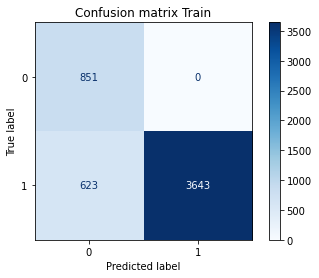

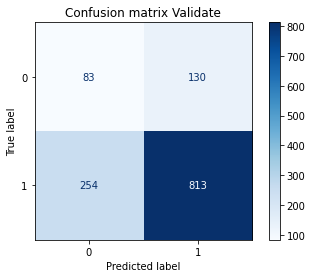

In [22]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.6}),x_train,y_train,x_val,y_val)

Accuracy Score:  0.9102990033222591  F1 Score  0.9431438127090301  Recall Score  0.8924050632911392  R2 Score  0.9102990033222591  ROC_AUC_SCORE  0.9923949816630058 ( Train )
Accuracy Score:  0.72734375  F1 Score  0.8313194780086999  Recall Score  0.8059981255857545  R2 Score  0.72734375  ROC_AUC_SCORE  0.6335498149785939 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.7}, max_depth=15,
                        random_state=8),
 0.9923949816630058,
 0.6335498149785939)

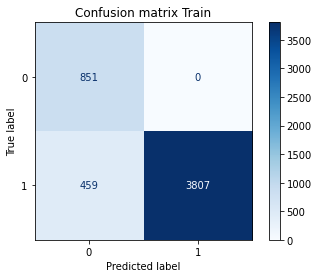

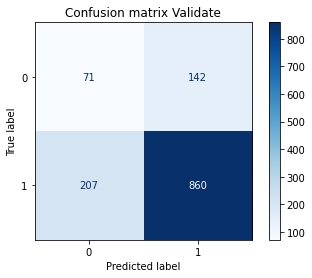

In [23]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.7}),x_train,y_train,x_val,y_val)

Accuracy Score:  0.9364862223959352  F1 Score  0.9604093068583263  Recall Score  0.9240506329113924  R2 Score  0.9364862223959352  ROC_AUC_SCORE  0.9961510767784847 ( Train )
Accuracy Score:  0.7609375  F1 Score  0.8564727954971858  Recall Score  0.8556701030927835  R2 Score  0.7609375  ROC_AUC_SCORE  0.6289253798328867 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=15,
                        random_state=8),
 0.9961510767784847,
 0.6289253798328867)

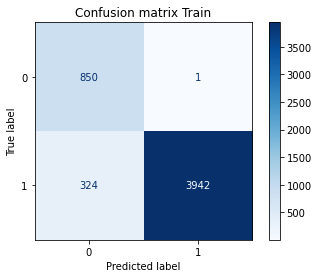

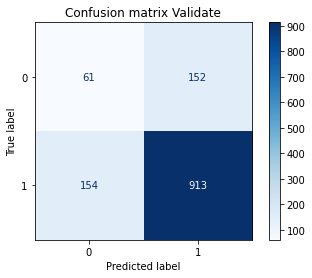

In [24]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.8}),x_train,y_train,x_val,y_val)

Accuracy Score:  0.9609145983974985  F1 Score  0.9759961593855018  Recall Score  0.953117674636662  R2 Score  0.9609145983974985  ROC_AUC_SCORE  0.9990218617076074 ( Train )
Accuracy Score:  0.76796875  F1 Score  0.8630705394190872  Recall Score  0.8772258669165885  R2 Score  0.76796875  ROC_AUC_SCORE  0.6228269334846945 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.9}, max_depth=15,
                        random_state=8),
 0.9990218617076074,
 0.6228269334846945)

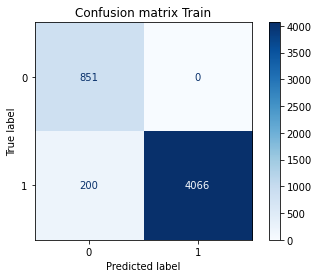

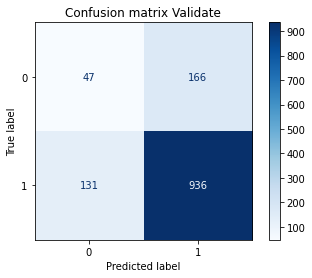

In [25]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.9}),x_train,y_train,x_val,y_val)

Accuracy Score:  0.9976548759038499  F1 Score  0.9985915492957746  Recall Score  0.9971870604781997  R2 Score  0.9976548759038499  ROC_AUC_SCORE  0.9999950418222295 ( Train )
Accuracy Score:  0.81640625  F1 Score  0.8969750109601052  Recall Score  0.9587628865979382  R2 Score  0.81640625  ROC_AUC_SCORE  0.6290353806688931 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=20,
                        random_state=8),
 0.9999950418222295,
 0.6290353806688931)

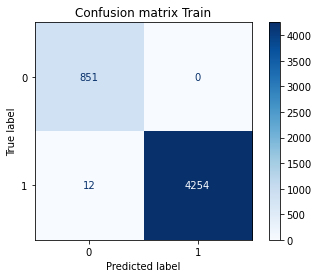

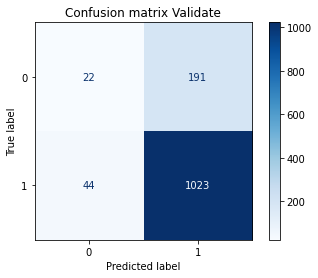

In [26]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 20,class_weight={0:10,1:0.8}),x_train,y_train,x_val,y_val)

max_depth = 15 + class_weight {0:10,1:0.8} looks like a good fit between Test and Valdiation. Tunning min_samples_leaf

#### Tunning Min_samples_leaf

Accuracy Score:  0.9405901895641978  F1 Score  0.9630529897909577  Recall Score  0.9287388654477262  R2 Score  0.9405901895641978  ROC_AUC_SCORE  0.9969187679699513 ( Train )
Accuracy Score:  0.7546875  F1 Score  0.8518867924528303  Recall Score  0.8462980318650422  R2 Score  0.7546875  ROC_AUC_SCORE  0.6330548112165653 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=15,
                        min_samples_leaf=2, random_state=8),
 0.9969187679699513,
 0.6330548112165653)

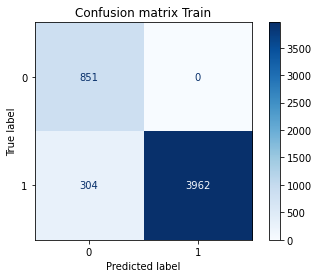

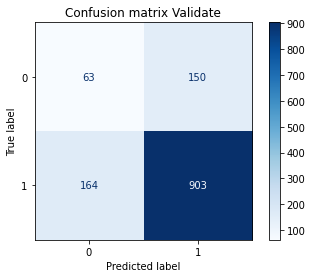

In [27]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.8} ,min_samples_leaf=2 ),x_train,y_train,x_val,y_val)

Accuracy Score:  0.6421731483290991  F1 Score  0.7280558443487303  Recall Score  0.5745428973277075  R2 Score  0.6421731483290991  ROC_AUC_SCORE  0.9041807354960905 ( Train )
Accuracy Score:  0.53203125  F1 Score  0.6406718656268746  Recall Score  0.5004686035613871  R2 Score  0.53203125  ROC_AUC_SCORE  0.651732953170444 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=15,
                        min_samples_leaf=20, random_state=8),
 0.9041807354960905,
 0.651732953170444)

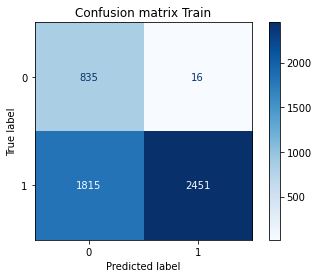

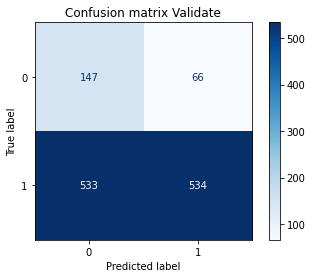

In [28]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.8},min_samples_leaf=20),x_train,y_train,x_val,y_val)

Accuracy Score:  0.5821770568692594  F1 Score  0.6674961119751167  Recall Score  0.503047351148617  R2 Score  0.5821770568692594  ROC_AUC_SCORE  0.8781841830823669 ( Train )
Accuracy Score:  0.48828125  F1 Score  0.5883092394720302  Recall Score  0.4386129334582943  R2 Score  0.48828125  ROC_AUC_SCORE  0.6548525768795843 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=15,
                        min_samples_leaf=25, random_state=8),
 0.8781841830823669,
 0.6548525768795843)

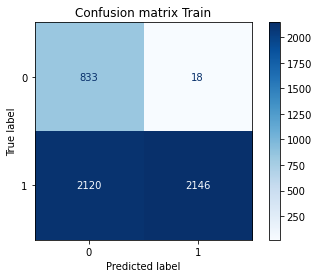

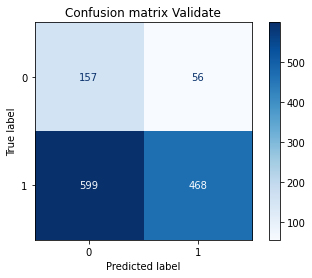

In [29]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.8},min_samples_leaf=25 ),x_train,y_train,x_val,y_val)

max_depth= 15,class_weight={0:10,1:0.8} , min_sample_leaf = 2 is fine


#### Tunning max_features

Accuracy Score:  0.9540746531170607  F1 Score  0.9716765095817765  Recall Score  0.9449132676980778  R2 Score  0.9540746531170607  ROC_AUC_SCORE  0.9973247876384916 ( Train )
Accuracy Score:  0.75703125  F1 Score  0.8540591271703426  Recall Score  0.8528584817244611  R2 Score  0.75703125  ROC_AUC_SCORE  0.6251215509237871 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=15,
                        max_features=2, min_samples_leaf=2, random_state=8),
 0.9973247876384916,
 0.6251215509237871)

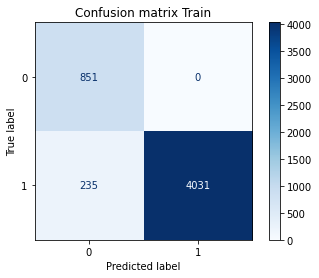

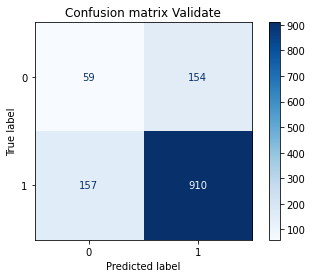

In [30]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.8} ,min_samples_leaf=2,max_features=2 ),x_train,y_train,x_val,y_val)

Accuracy Score:  0.9003322259136213  F1 Score  0.9364248317127899  Recall Score  0.8804500703234881  R2 Score  0.9003322259136213  ROC_AUC_SCORE  0.9870858750880764 ( Train )
Accuracy Score:  0.73828125  F1 Score  0.8380860318994683  Recall Score  0.8125585754451734  R2 Score  0.73828125  ROC_AUC_SCORE  0.6325620074712568 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=15,
                        max_features=15, min_samples_leaf=2, random_state=8),
 0.9870858750880764,
 0.6325620074712568)

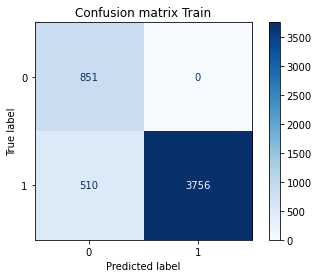

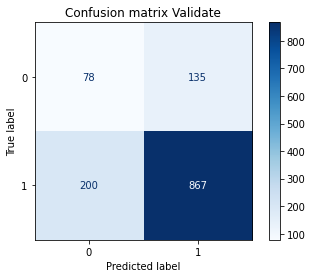

In [31]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.8} ,min_samples_leaf=2,max_features=15 ),x_train,y_train,x_val,y_val)

Accuracy Score:  0.9204612077389095  F1 Score  0.9499076923076923  Recall Score  0.9045944678856072  R2 Score  0.9204612077389095  ROC_AUC_SCORE  0.9924084789247145 ( Train )
Accuracy Score:  0.7421875  F1 Score  0.8430066603235015  Recall Score  0.8303655107778819  R2 Score  0.7421875  ROC_AUC_SCORE  0.6316556005825644 ( Validate )


(RandomForestClassifier(class_weight={0: 10, 1: 0.8}, max_depth=15,
                        max_features=6, min_samples_leaf=2, random_state=8),
 0.9924084789247145,
 0.6316556005825644)

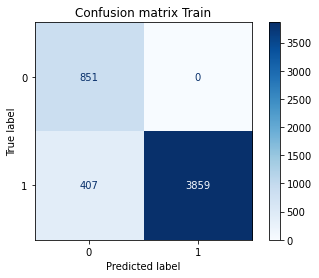

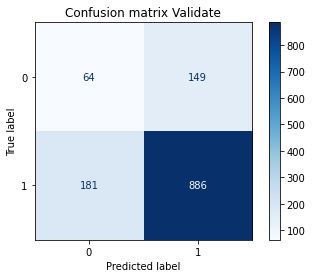

In [32]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:10,1:0.8} ,min_samples_leaf=2,max_features=6 ),x_train,y_train,x_val,y_val)

max_feature = 6 looks okay.

#### Adjusting Class_weight to see performance 

Accuracy Score:  0.9288645690834473  F1 Score  0.955435847208619  Recall Score  0.9146741678387248  R2 Score  0.9288645690834473  ROC_AUC_SCORE  0.9935637343452424 ( Train )
Accuracy Score:  0.75078125  F1 Score  0.8485999050783104  Recall Score  0.837863167760075  R2 Score  0.75078125  ROC_AUC_SCORE  0.6333562135072226 ( Validate )


(RandomForestClassifier(class_weight={0: 9.559, 1: 0.8}, max_depth=15,
                        max_features=6, min_samples_leaf=2, random_state=8),
 0.9935637343452424,
 0.6333562135072226)

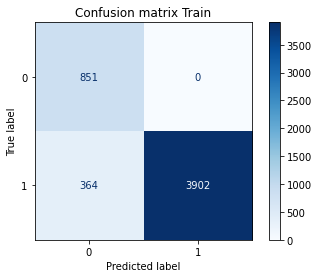

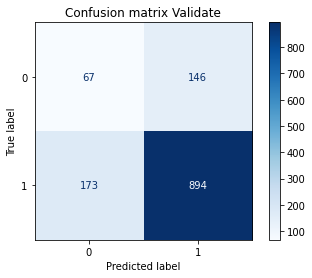

In [33]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:9.559,1:.8} ,min_samples_leaf=2,max_features=6 ),x_train,y_train,x_val,y_val)

Accuracy Score:  0.9990228649599374  F1 Score  0.9994140396109222  Recall Score  0.9995311767463666  R2 Score  0.9990228649599374  ROC_AUC_SCORE  0.9999881554642149 ( Train )
Accuracy Score:  0.81796875  F1 Score  0.8981198076082204  Recall Score  0.9625117150890347  R2 Score  0.81796875  ROC_AUC_SCORE  0.6510245477865632 ( Validate )


(RandomForestClassifier(class_weight={0: 0.833688, 1: 0.166312}, max_depth=15,
                        max_features=6, min_samples_leaf=2, random_state=8),
 0.9999881554642149,
 0.6510245477865632)

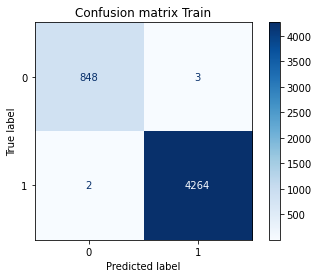

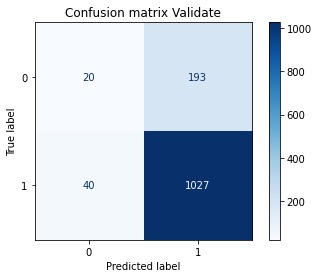

In [34]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:0.833688,1:0.166312} ,min_samples_leaf=2,max_features=6 ),x_train,y_train,x_val,y_val)

Accuracy Score:  0.99921829196795  F1 Score  0.999531286618233  Recall Score  0.9997655883731833  R2 Score  0.99921829196795  ROC_AUC_SCORE  0.9999950418222294 ( Train )
Accuracy Score:  0.825  F1 Score  0.9025239338555265  Recall Score  0.971883786316776  R2 Score  0.825  ROC_AUC_SCORE  0.6570393934993907 ( Validate )


(RandomForestClassifier(class_weight={0: 0.84, 1: 0.17}, max_depth=15,
                        max_features=6, min_samples_leaf=2, random_state=8),
 0.9999950418222294,
 0.6570393934993907)

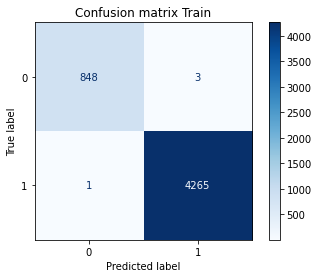

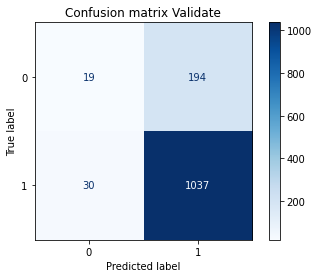

In [35]:
evm.eval_model(RandomForestClassifier(random_state=8,max_depth= 15,class_weight={0:.84,1:0.17} ,min_samples_leaf=2,max_features=6 ),x_train,y_train,x_val,y_val)

From the above training found the boundry conditions where the model give a good fit that can be futher investigated

#### Grid Search Cross Valiation Search for best hyperparameters

In [36]:
cw=[{0: 0.833688,1:0.166312}, {0:10,1:0.1}, {0:10,1:0.3}, {0:10,1:0.6}, {0: 10, 1: 0.9}, {0:.84,1:0.17}]

In [37]:
hyperparam_grid = {
    'class_weight': cw,
    'max_depth': np.arange(3,15,3),
    'max_features': np.arange(2,14,4),
    'min_samples_leaf': np.arange(2,10,2),
    'n_estimators':  np.arange(125,200,25)
}
hyperparam_grid

{'class_weight': [{0: 0.833688, 1: 0.166312},
  {0: 10, 1: 0.1},
  {0: 10, 1: 0.3},
  {0: 10, 1: 0.6},
  {0: 10, 1: 0.9},
  {0: 0.84, 1: 0.17}],
 'max_depth': array([ 3,  6,  9, 12]),
 'max_features': array([ 2,  6, 10]),
 'min_samples_leaf': array([2, 4, 6, 8]),
 'n_estimators': array([125, 150, 175])}

*The model runs for about 30-40 mins*

In [38]:
rf_grid = RandomForestClassifier(random_state=8)

In [39]:
grid_search_rf = GridSearchCV(rf_grid, hyperparam_grid, cv=2, scoring='roc_auc', verbose=1)

In [40]:
grid_search_rf.fit(x, y)

Fitting 2 folds for each of 864 candidates, totalling 1728 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'class_weight': [{0: 0.833688, 1: 0.166312},
                                          {0: 10, 1: 0.1}, {0: 10, 1: 0.3},
                                          {0: 10, 1: 0.6}, {0: 10, 1: 0.9},
                                          {0: 0.84, 1: 0.17}],
                         'max_depth': array([ 3,  6,  9, 12]),
                         'max_features': array([ 2,  6, 10]),
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'n_estimators': array([125, 150, 175])},
             scoring='roc_auc', verbose=1)

In [41]:
grid_search_rf.best_score_

0.6765446562156474

In [42]:
grid_search_rf.best_params_

{'class_weight': {0: 0.84, 1: 0.17},
 'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 8,
 'n_estimators': 150}

Accuracy Score:  0.7508305647840532  F1 Score  0.8365175022438774  Recall Score  0.7646507266760432  R2 Score  0.7508305647840532  ROC_AUC_SCORE  0.7980239457949969 ( Train )
Accuracy Score:  0.671875  F1 Score  0.7830578512396694  Recall Score  0.7104029990627929  R2 Score  0.671875  ROC_AUC_SCORE  0.6608938227930532 ( Validate )


(RandomForestClassifier(class_weight={0: 0.84, 1: 0.17}, max_depth=6,
                        max_features=2, min_samples_leaf=8, n_estimators=125,
                        random_state=8),
 0.7980239457949969,
 0.6608938227930532)

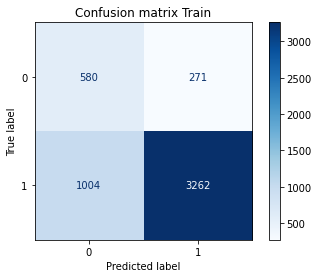

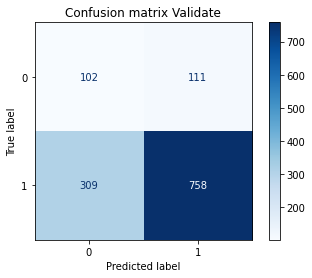

In [43]:
rf_final = RandomForestClassifier(random_state=8,class_weight={0:.84,1:0.17} ,max_depth= 6,max_features=2,min_samples_leaf=8,n_estimators=125 )
evm.eval_model(rf_final,x_train,y_train,x_val,y_val)

Accuracy Score:  0.68875  F1 Score  0.795566502463054  Recall Score  0.7263868065967016  R2 Score  0.68875  ROC_AUC_SCORE  0.655854403625255 ( Test )


0.655854403625255

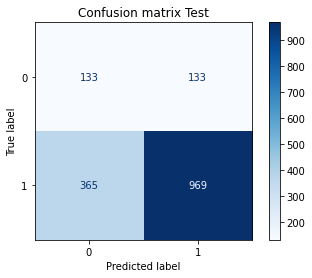

In [44]:
evm.get_performance(rf_final, x_test, y_test, "Test", True)

In [45]:
dump(rf_final,  '../models/sp_model_final.joblib')

['../models/sp_model_final.joblib']

#### Checking Feature Importance

In [46]:
importance=rf_final.feature_importances_
feature_name = x_col_name
sorted_idx = rf_final.feature_importances_.argsort()
sorted_idx

array([12,  5, 14, 13,  4,  1, 10,  2,  9, 11,  3,  6,  7,  8,  0],
      dtype=int64)

Text(0.5, 0, 'Random Forest Feature Importance')

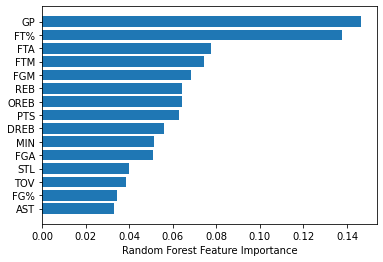

In [47]:
from matplotlib import pyplot as plt
plt.barh(feature_name[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")